In [6]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [9]:
print(len(train_data))
print(len(test_data))
print(len(train_targets))
print(len(test_targets))
print(train_data)

404
102
404
102
[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


In [10]:
mean = train_data.mean(axis=0) #z-score방식으로 표준화(전처리)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [37]:
import numpy as np
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 200
all_scores = []
all_mae_histories=[]
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples : (i+1) *num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [38]:
from tensorflow.keras import models #딥러닝 모델 구성
from tensorflow.keras import layers
import tensorflow as tf
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) #train_data.shape(404, 13)이기 때문에 .shape[1]은 13
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [39]:
model = build_model()

history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs = num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)

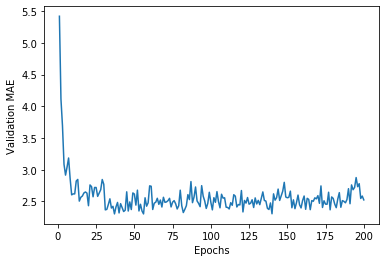

In [40]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

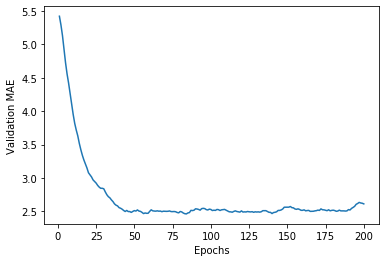

In [41]:
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor+ point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history)
#print(average_mae_history)
#print(smooth_mae_history)
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [42]:
test_loss, test_mae_score=model.evaluate(test_data, test_targets)
print(test_loss, test_mae_score)

102/102 [==============================] - 0s 39us/sample - loss: 20.7588 - mean_absolute_error: 3.0503
20.7588264614928 3.050348


In [43]:
prediction = model.predict(test_data[:3])
print(prediction)
print(test_targets[0:3]) #11.976 >> 11772달러로 예측

[[11.976369]
 [16.73486 ]
 [20.720898]]
[ 7.2 18.8 19. ]
